In [ ]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score


In [5]:
# Load dataset 
df = pd.read_csv(r"C:\Users\USER\Downloads\creditcard.csv")

In [6]:
# Display basic info and check class distribution
print(df.info())
print(df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

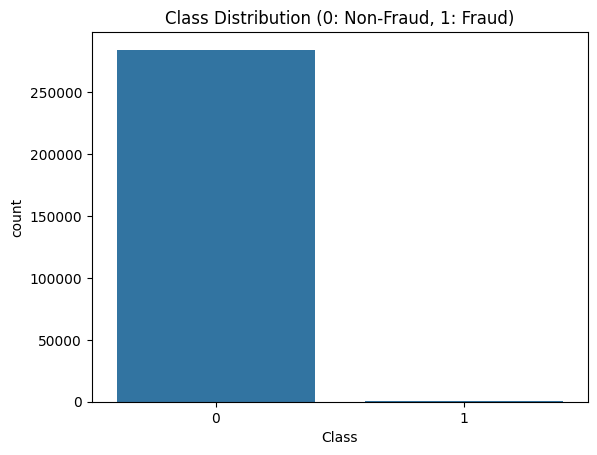

In [7]:
# Plot class distribution (fraud vs non-fraud)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

In [8]:
# Seperate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [9]:
# Split data into train and test sets (stratify to keep class ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Make predictions on test set
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test) [:, 1]

In [12]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test,y_probs):.4f}")

Confusion Matrix:
[[56861     3]
 [   25    73]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9529


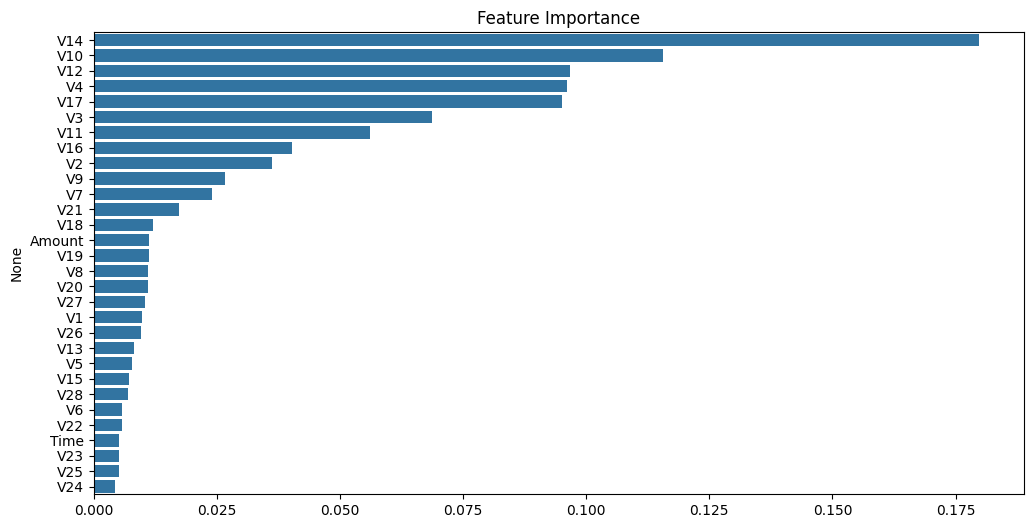

In [14]:
# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances) [::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importance')
plt.show()
